In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("benchmark_results03.txt", delimiter='\t')
data["Configs"] = data["Limit"].astype(str) + " × " + data["TopDocs"].astype(str)
data["Labels"] = (data["Size"] // 1000).astype(str) + "k - " + data["Configs"].astype(str)
data.head()

,Size,Limit,TopDocs,Sequential,Terms,Documents,Values,Time,Configs,Labels
0,1000,0,200,0,114710,1000,665760,6.3,0 × 200,1k - 0 × 200
1,1000,0,200,1,114710,1000,665760,13.9,0 × 200,1k - 0 × 200
2,1000,0,400,0,114710,1000,699202,7.4,0 × 400,1k - 0 × 400
3,1000,0,400,1,114710,1000,699202,14.9,0 × 400,1k - 0 × 400
4,1000,0,0,0,114710,1000,704950,7.2,0 × 0,1k - 0 × 0


# Show terms and weights count

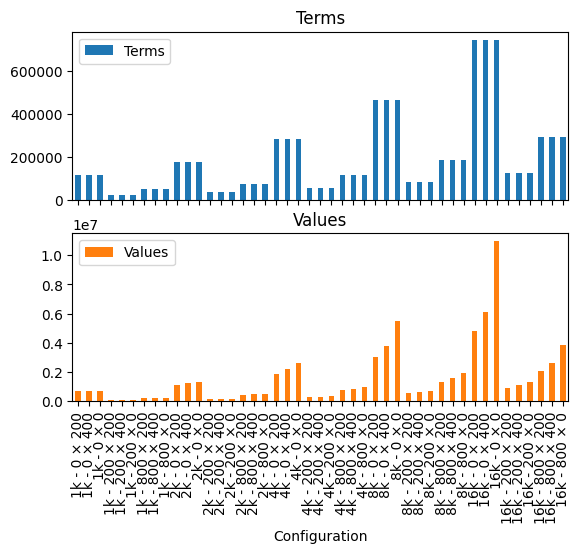

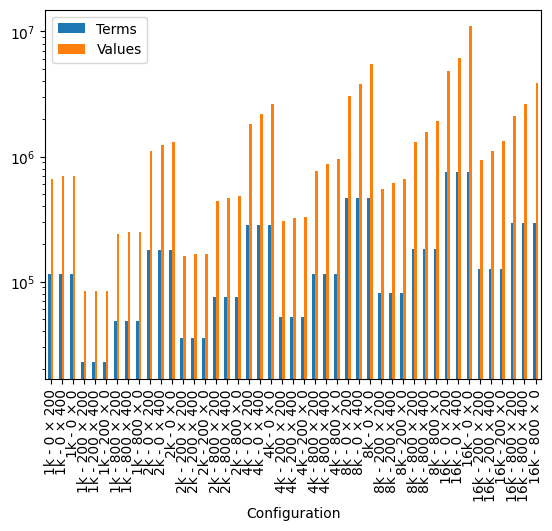

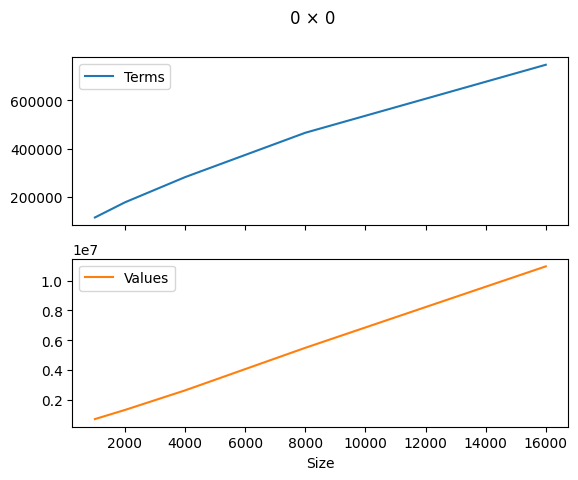

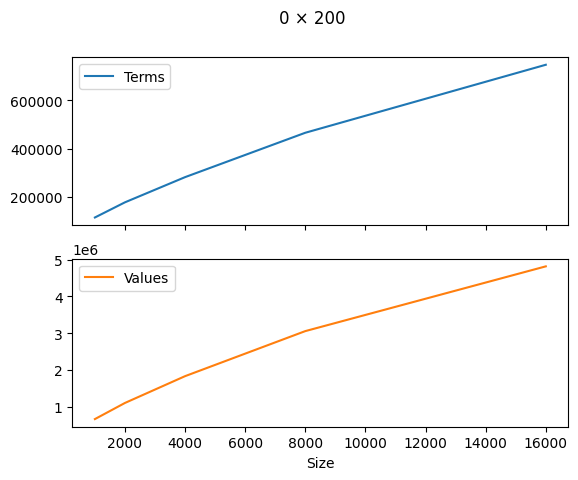

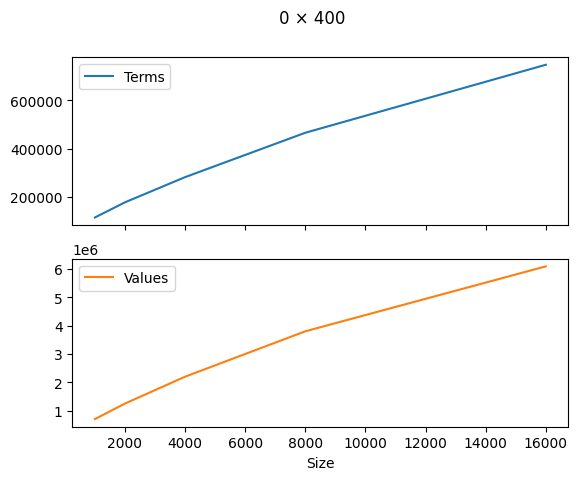

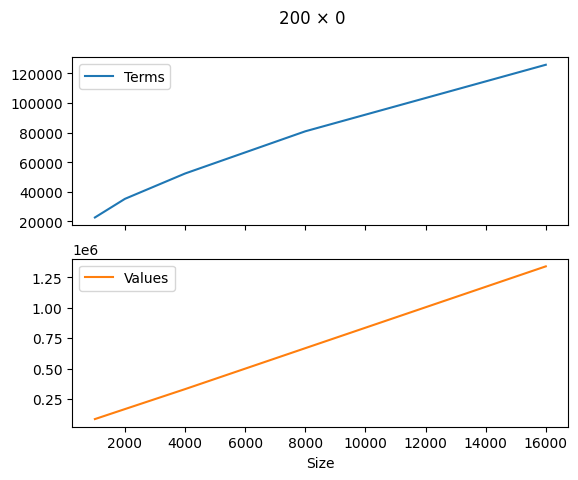

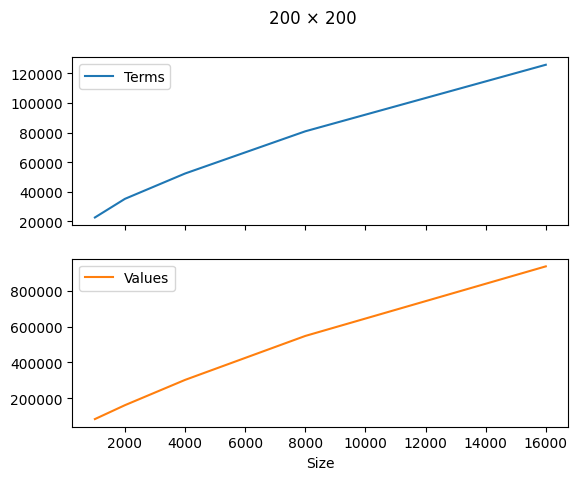

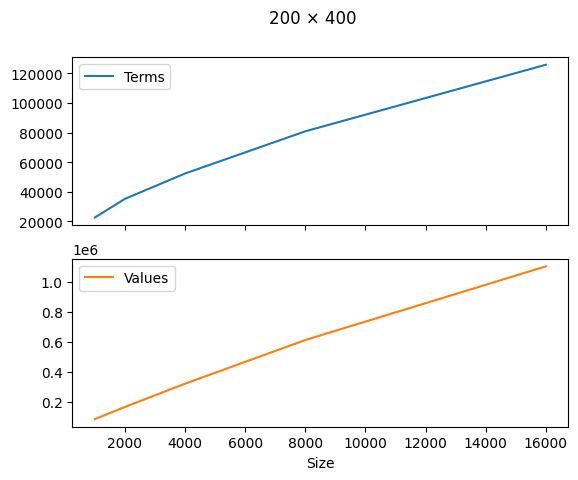

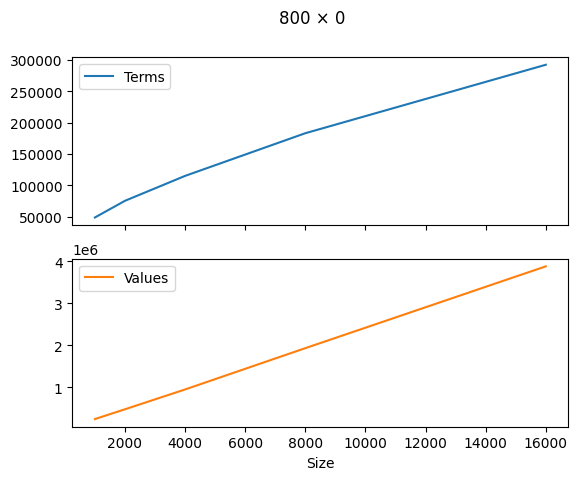

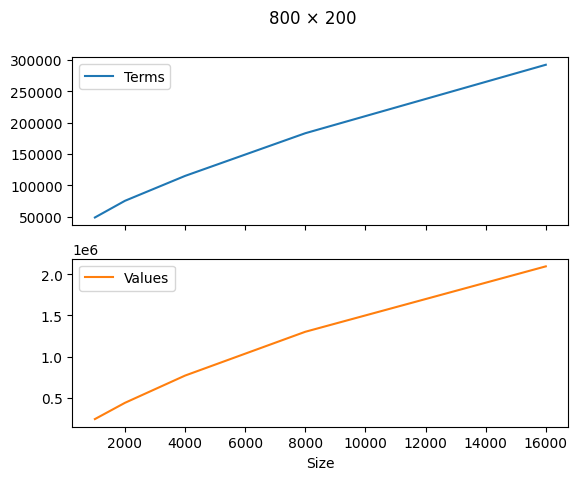

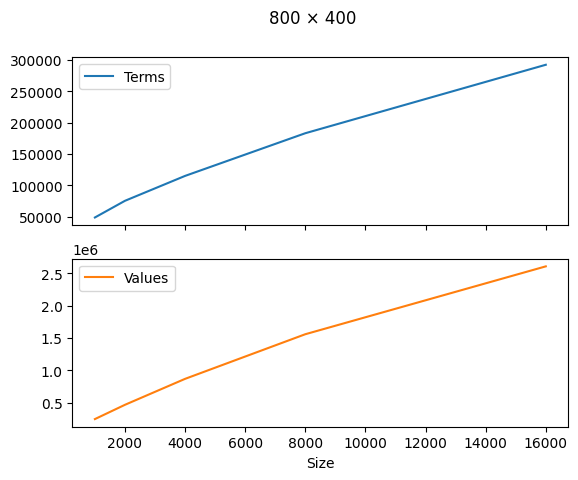

In [16]:
filtered = data
filtered = filtered[["Size", "Terms", "Values", "Limit", "TopDocs", "Labels", "Configs"]].drop_duplicates()
filtered.plot(x="Labels", kind="bar", y=["Terms", "Values"], xlabel="Configuration", subplots=True)
filtered.plot(x="Labels", kind="bar", y=["Terms", "Values"], logy=True, xlabel="Configuration")


for _, group in filtered.groupby(by=["Limit", "TopDocs"]):
    group.plot(x="Size", kind="line", y=["Terms", "Values"], subplots=True, xlabel="Size", title = group["Configs"].iloc[0])
#filtered.groupby(by=["Limit", "TopDocs"]).plot(x="Size", kind="line", y=["Terms", "Values"], subplots=True, xlabel="Size")
# filtered.groupby(by="Size").plot(x="Labels", kind="bar", y=["Terms", "Values"], xlabel="Configuration")

# Time per operation

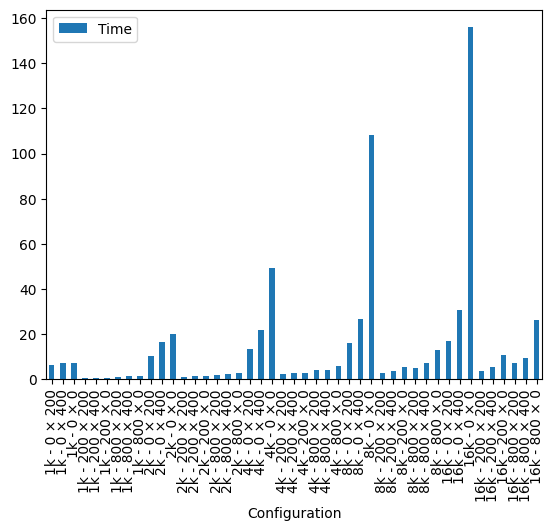

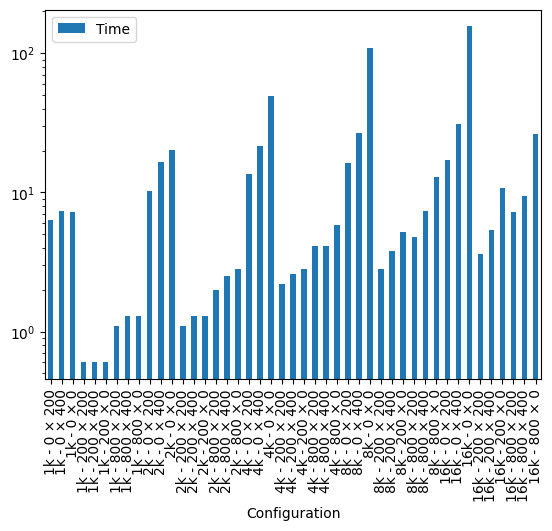

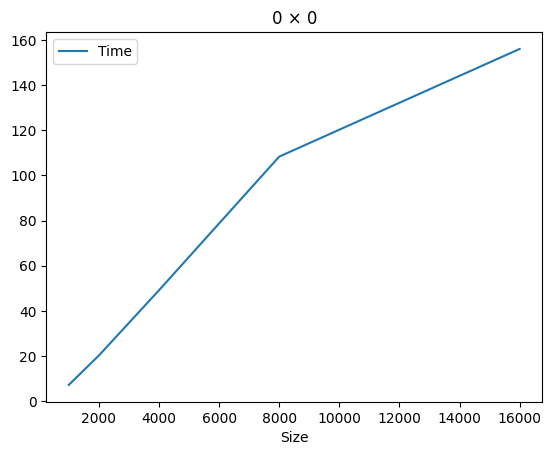

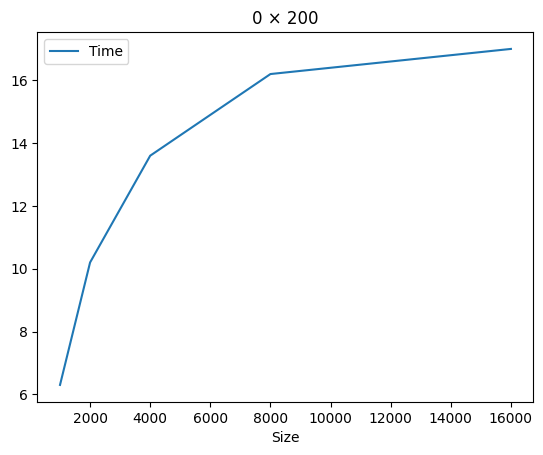

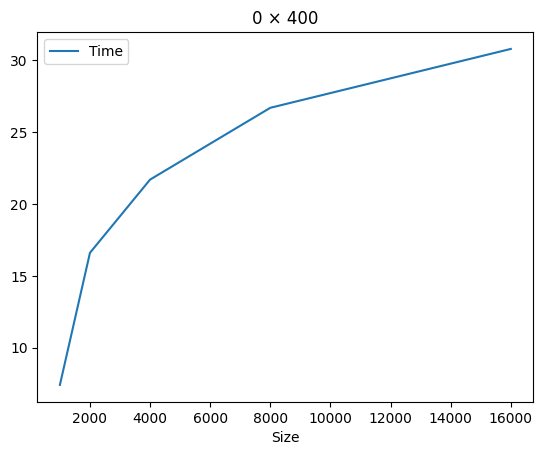

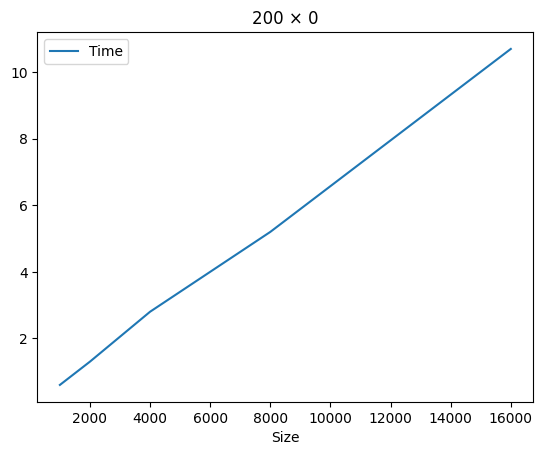

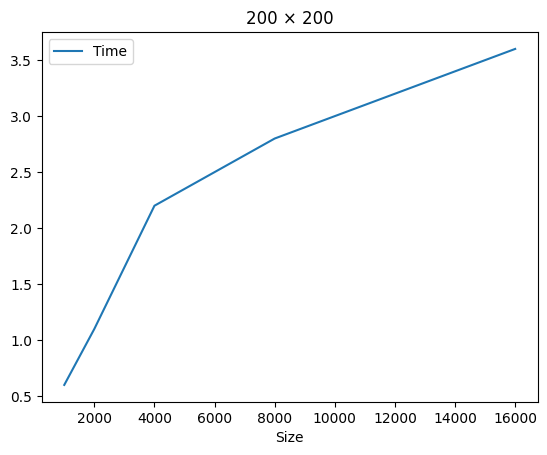

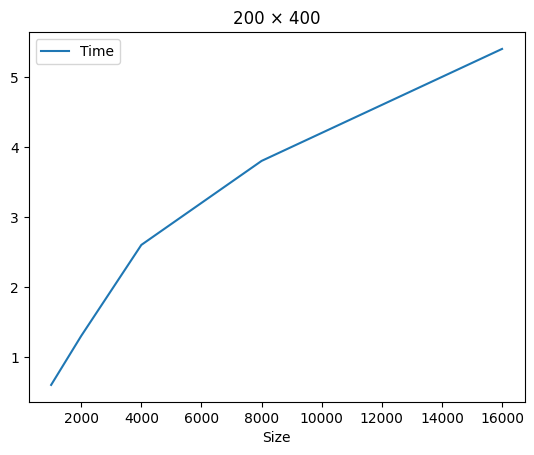

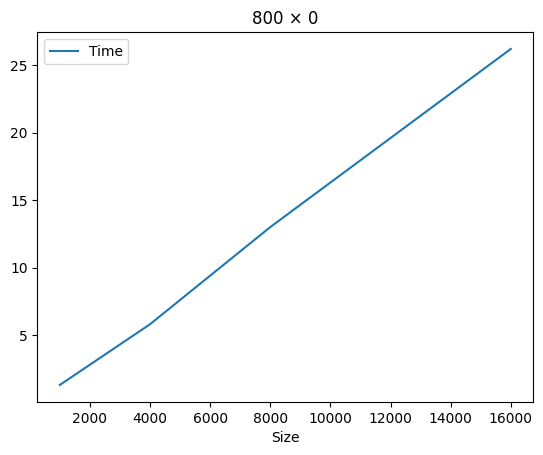

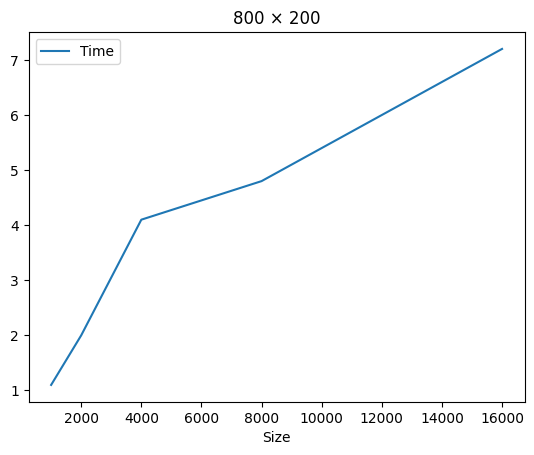

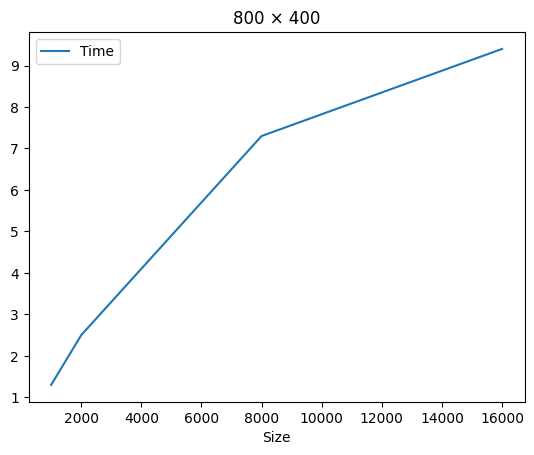

In [7]:
filtered = data.copy()
filtered = filtered.loc[filtered["Sequential"] == 0]

filtered.plot(x="Labels", kind="bar", y=["Time"], xlabel="Configuration")
filtered.plot(x="Labels", kind="bar", y=["Time"], logy=True, xlabel="Configuration")

for _, group in filtered.groupby(by=["Limit", "TopDocs"]):
    group.plot(x="Size", kind="line", y=["Time"], xlabel="Size", title = group["Configs"].iloc[0])
    
# filtered.groupby(by="Size").plot(x="Labels", kind="bar", y=["Time"], xlabel="Configuration")

# Sequential comparison

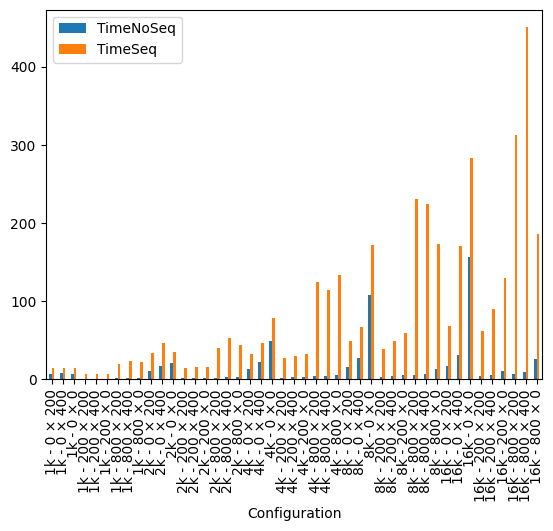

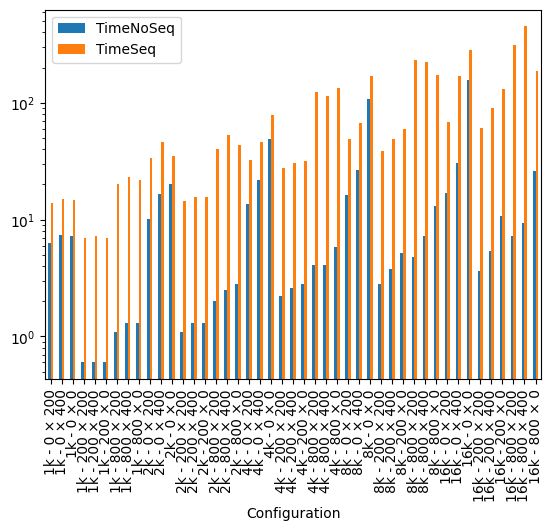

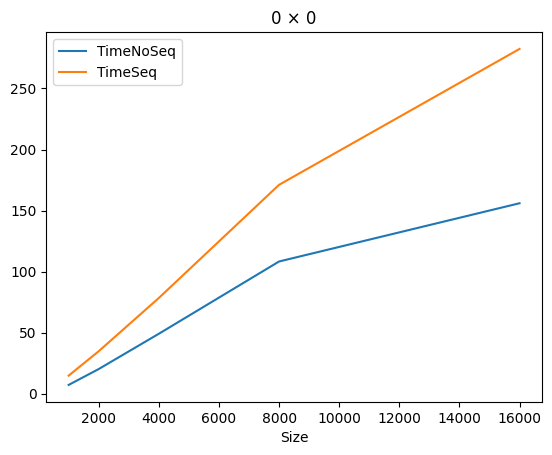

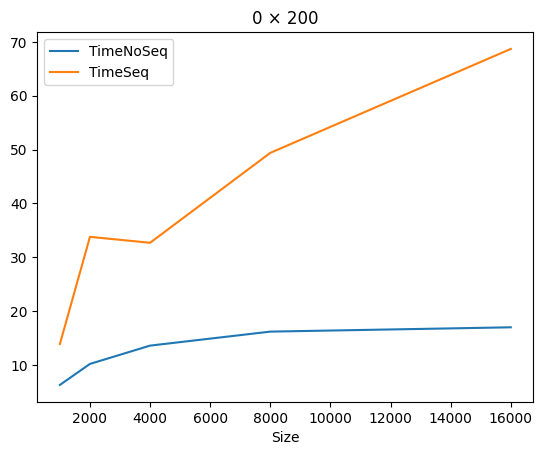

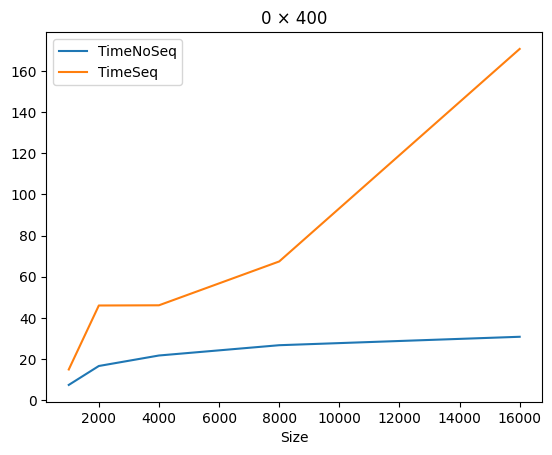

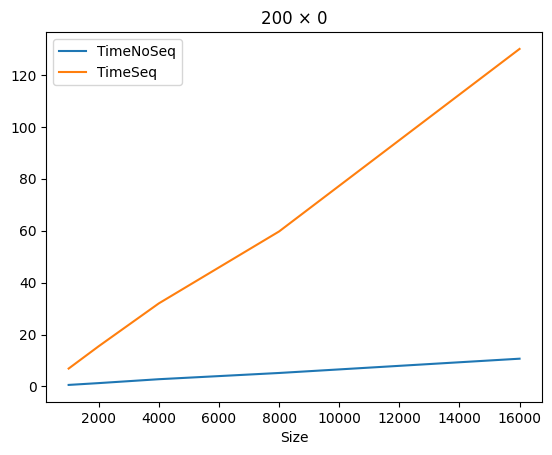

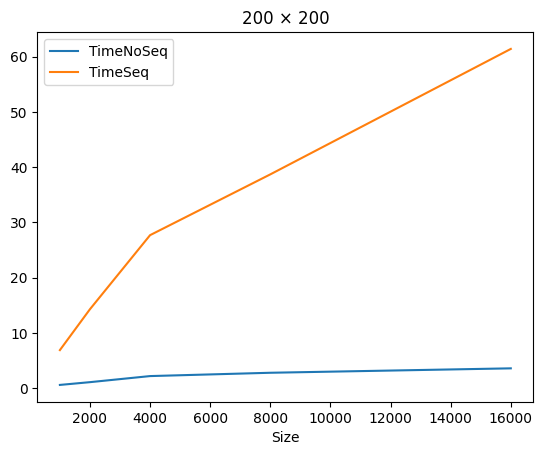

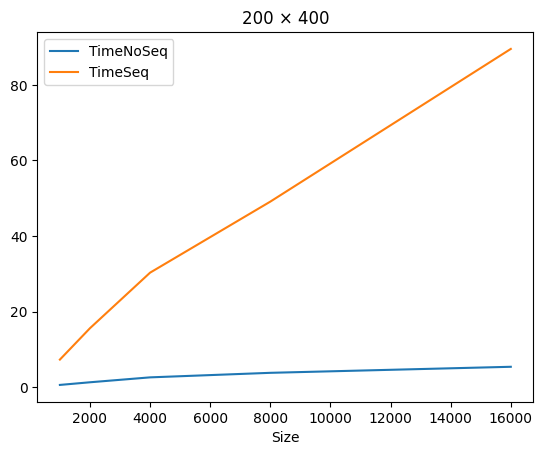

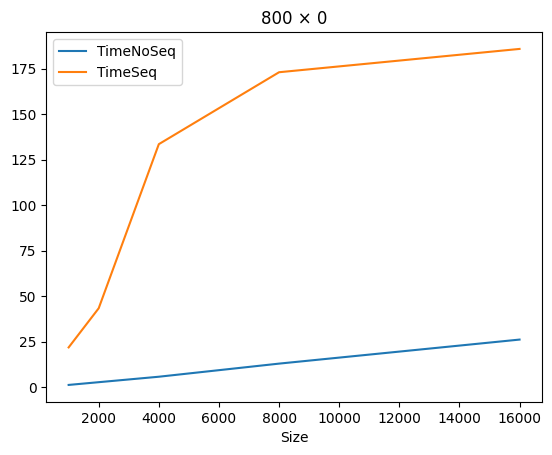

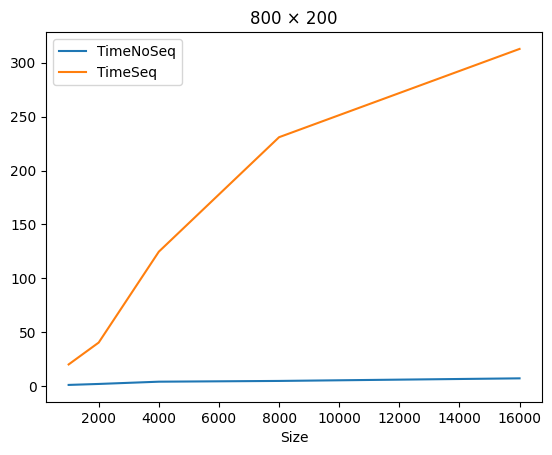

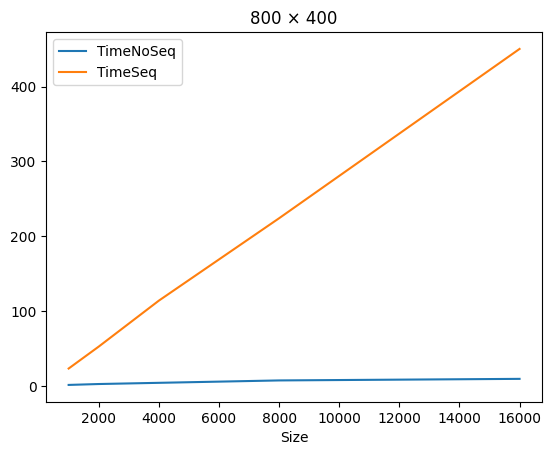

In [8]:
filtered = data.copy()
    
filtered["TimeNoSeq"] = filtered["Time"].shift(periods=0)
filtered["TimeSeq"] = filtered["Time"].shift(periods=-1)
filtered = filtered.loc[filtered["Sequential"] == 0]

filtered.plot(x="Labels", kind="bar", y=["TimeNoSeq", "TimeSeq"], xlabel="Configuration")
filtered.plot(x="Labels", kind="bar", y=["TimeNoSeq", "TimeSeq"], logy=True, xlabel="Configuration")

for _, group in filtered.groupby(by=["Limit", "TopDocs"]):
    group.plot(x="Size", kind="line", y=["TimeNoSeq", "TimeSeq"], xlabel="Size", title = group["Configs"].iloc[0])

# filtered.groupby(by="Size").plot(x="Labels", kind="bar", y=["TimeNoSeq", "TimeSeq"], xlabel="Configuration")